Kaggle notebooks fall into two categories

* EDA notebooks with lots of pretty charts, but not much focus on understanding the key issues that will make a difference in the competition

* Training notebooks with little detail about why each step was chosen


In this US patent phrase to phrase matching competition the focus generally should be two things

* creating an effective validation set
* Iterating rapidly to find changes which improve results on the validation set

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df

,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00
...,...,...,...,...,...
36468,8e1386cbefd7f245,wood article,wooden article,B44,1.00
36469,42d9e032d1cd3242,wood article,wooden box,B44,0.50
36470,208654ccb9e14fa3,wood article,wooden handle,B44,0.50
36471,756ec035e694722b,wood article,wooden material,B44,0.75


In [6]:
eval_df = pd.read_csv('test.csv')
eval_df

,id,anchor,target,context
0,4112d61851461f60,opc drum,inorganic photoconductor drum,G02
1,09e418c93a776564,adjust gas flow,altering gas flow,F23
2,36baf228038e314b,lower trunnion,lower locating,B60
3,1f37ead645e7f0c8,cap component,upper portion,D06
4,71a5b6ad068d531f,neural stimulation,artificial neural network,H04
5,474c874d0c07bd21,dry corn,dry corn starch,C12
6,442c114ed5c4e3c9,tunneling capacitor,capacitor housing,G11
7,b8ae62ea5e1d8bdb,angular contact bearing,contact therapy radiation,B23
8,faaddaf8fcba8a3f,produce liquid hydrocarbons,produce a treated stream,C10
9,ae0262c02566d2ce,diesel fuel tank,diesel fuel tanks,F02


In [7]:
eval_df.head()

,id,anchor,target,context
0,4112d61851461f60,opc drum,inorganic photoconductor drum,G02
1,09e418c93a776564,adjust gas flow,altering gas flow,F23
2,36baf228038e314b,lower trunnion,lower locating,B60
3,1f37ead645e7f0c8,cap component,upper portion,D06
4,71a5b6ad068d531f,neural stimulation,artificial neural network,H04


In [8]:
#Lets look at the distribution of values of target

df.target.value_counts()

# There are quite a few words which are unique
# And the sentences have few common words

composition                    24
data                           22
metal                          22
motor                          22
assembly                       21
                               ..
switching switch over valve     1
switching switch off valve      1
switching over valve            1
switching off valve             1
wooden substrate                1
Name: target, Length: 29340, dtype: int64

In [9]:
df.anchor.value_counts()

component composite coating              152
sheet supply roller                      150
source voltage                           140
perfluoroalkyl group                     136
el display                               135
                                        ... 
plug nozzle                                2
shannon                                    2
dry coating composition1                   2
peripheral nervous system stimulation      1
conduct conducting material                1
Name: anchor, Length: 733, dtype: int64

In [10]:
#Lets check the context

df.context.value_counts()

H01    2186
H04    2177
G01    1812
A61    1477
F16    1091
       ... 
B03      47
F17      33
B31      24
A62      23
F26      18
Name: context, Length: 106, dtype: int64

In [11]:
#These are just short codes. Some of them have very few examples. The first character is the section the patent was filed under -- lets' create a column for that and look at the distribution:

df['section'] = df.context.str[0]
df.section.value_counts()

B    8019
H    6195
G    6013
C    5288
A    4094
F    4054
E    1531
D    1279
Name: section, dtype: int64

In [12]:
#The above value is useful for they've got quite a bit more data in each.
#Finally we will take a look at a histogram of the scores:

<Axes: >

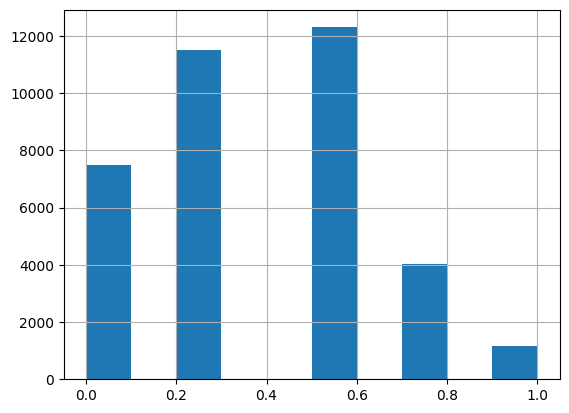

In [13]:
df.score.hist()

In [14]:
#There is a small number of people who scored 1.0 -here's a sample

df[df.score==1]


#We can see from this that these are just minor rewordings of the same concept, and isnt likeyly to be specific to context. Any pretrained model should be pretty good at finding these already

,id,anchor,target,context,score,section
28,473137168ebf7484,abatement,abating,F24,1.0,F
158,621b048d70aa8867,absorbent properties,absorbent characteristics,D01,1.0,D
161,bc20a1c961cb073a,absorbent properties,absorption properties,D01,1.0,D
311,e955700dffd68624,acid absorption,absorption of acid,B08,1.0,B
315,3a09aba546aac675,acid absorption,acid absorption,B08,1.0,B
...,...,...,...,...,...,...
36398,913141526432f1d6,wiring trough,wiring troughs,F16,1.0,F
36435,ee0746f2a8ecef97,wood article,wood articles,B05,1.0,B
36440,ecaf479135cf0dfd,wood article,wooden article,B05,1.0,B
36464,8ceaa2b5c2d56250,wood article,wood article,B44,1.0,B


Training

In [15]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from torch.utils.data import DataLoader
import warnings, transformers, logging, torch
from transformers import TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from datasets import Dataset, DatasetDict
#TrainingArguments control the training loop
#Trainer takes model, dataset, tokenizer and training arguments object as arguments and handles distributed training.

import warnings
warnings.simplefilter('ignore')
logging.disable(logging.WARNING)

In [18]:
#deberta-v3-small lets you train a model at a reasonable time


model_nm = 'microsoft/deberta-v3-small'

In [19]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
#We can now create a tokenizer for this mdoel. Note that pretrained models assume that text is tokenized in a particular way. In order to ensure that your tokenizer matches your model, use the AutoTokenizer


tokz = AutoTokenizer.from_pretrained(model_nm)

In [21]:
#We will need to combine the context, anchor and target together somehow. THere's not much research as to the best way to do this, so we may need to iterate a bit. TO start with, we will just combine them all into a single string. The model will need to know where each section starts, so we can use teh special separator token to tell it:


sep =  tokz.sep_token
sep

'[SEP]'

In [22]:
#Let's now create our combined column

df['inputs'] = df.context  + sep + df.anchor + sep + df.target

In [23]:
df['inputs']

0        A47[SEP]abatement[SEP]abatement of pollution
1                A47[SEP]abatement[SEP]act of abating
2               A47[SEP]abatement[SEP]active catalyst
3           A47[SEP]abatement[SEP]eliminating process
4                 A47[SEP]abatement[SEP]forest region
                             ...                     
36468         B44[SEP]wood article[SEP]wooden article
36469             B44[SEP]wood article[SEP]wooden box
36470          B44[SEP]wood article[SEP]wooden handle
36471        B44[SEP]wood article[SEP]wooden material
36472       B44[SEP]wood article[SEP]wooden substrate
Name: inputs, Length: 36473, dtype: object

In [24]:
#Generally we will get best performance if we convert pandas DataFrames into HuggingFace Datasets, so we will convert them over, and also rename the score column to what Transformers expects for the dependent variable, which is label

In [25]:
ds = Dataset.from_pandas(df).rename_column('score', 'label')
eval_ds = Dataset.from_pandas(eval_df)

In [26]:
ds

Dataset({
    features: ['id', 'anchor', 'target', 'context', 'label', 'section', 'inputs'],
    num_rows: 36473
})

In [27]:
def tok_func(x):
    return tokz(x['inputs'])

In [28]:
tok_func(ds[0])

{'input_ids': [1, 336, 5753, 2, 47284, 2, 47284, 265, 6435, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [29]:
#We can see in the tokens that it starts with a special token 1 and then has our three fields separated by the separator token 2. We can check the indices of the special token IDs


tokz.all_special_tokens

['[CLS]', '[SEP]', '[UNK]', '[PAD]', '[MASK]']

In [30]:
#we can now tokenize the input. we will use batching to speed it up and remove the columns we no longer need


inps = 'anchor', 'target', 'context'
tok_ds = ds.map(tok_func, batched=True, remove_columns=inps+('inputs','id','section'))

Map:   0%|          | 0/36473 [00:00<?, ? examples/s]

In [31]:
tok_ds[0]

{'label': 0.5,
 'input_ids': [1, 336, 5753, 2, 47284, 2, 47284, 265, 6435, 2],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [32]:
#Creating a validation set
#Since the test anchors do not overlap with the training set
#Lets do the same thing for our validation set


anchors = df.anchor.unique()
np.random.seed(42)
np.random.shuffle(anchors)
anchors[:5]

array(['time digital signal', 'antiatherosclerotic', 'filled interior',
       'dispersed powder', 'locking formation'], dtype=object)

In [33]:
val_prop = 0.25
val_sz = int(len(anchors)*val_prop)
val_anchors = anchors[:val_sz]

In [34]:
is_val = np.isin(df.anchor, val_anchors)  #compares two series and returns true if they are similar
idxs = np.arange(len(df))
is_val

array([False, False, False, ..., False, False, False])

In [35]:
val_idxs = idxs[is_val]

In [36]:
trn_idxs = idxs[~is_val]

In [37]:
len(val_idxs), len(trn_idxs)

(9116, 27357)

In [38]:
#Out training and validation datasets can now be selected, and put inot a DatasetDict ready for training

dds = DatasetDict({'train':tok_ds.select(trn_idxs),'test': tok_ds.select(val_idxs)})

In [39]:
dds

DatasetDict({
    train: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 27357
    })
    test: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 9116
    })
})

In [40]:
df.iloc[trn_idxs].score.mean(), df.iloc[val_idxs].score.mean()

#Despite being random shuffle. the two groups are very similar despite just doing a random shuffle

(0.3623021530138539, 0.3613426941641071)

Initial Model

In [41]:
#Lets now train our model. We will need to specify a metric, which is the correlation coefficient provided by numpy

def corr(eval_pred):
    return {'pearson': np.corrcoef(*eval_pred)}

In [42]:
#We pick a learning rate and batch size that fits our GPU, and pick a reasonable weight decay and small number of epochs

In [57]:
lr, bs = 8e-5, 128
wd, epochs = 0.01, 2

In [58]:
#Transformers uses the TrainingArguments class to set up arguments. We'll use a cosine scheduler with warmup.


def get_trainer(dds):
    args = TrainingArguments('outputs',
                             learning_rate=lr,
                             warmup_ratio=0.1,
                             lr_scheduler_type='cosine',
                             fp16=True,
                             evaluation_strategy="epoch",
                             per_device_train_batch_size=bs,
                             per_device_train_eval_batch_size=bs*2,
                             num_train_epochs=epochs,
                             weight_decay=wd,
                             report_to = 'none')
    model = AutoModelForSequenceClassification.from_pretrained(model_nm, num_labels=1)
    return Trainer(model, args, train_dataset=dds['train'], eval_dataset=dds['test'],
                   tokenizer=tokz, compute_metrics=corr)

We can now create the trainer which combines the data and model together

In [59]:
args = TrainingArguments('outputs', learning_rate=lr, warmup_ratio=0.1, lr_scheduler_type='cosine', fp16=True,
    evaluation_strategy="epoch", per_device_train_batch_size=bs, per_device_eval_batch_size=bs*2,
    num_train_epochs=epochs, weight_decay=wd, report_to='none')

model = AutoModelForSequenceClassification.from_pretrained(model_nm, num_labels=1)

In [60]:
trainer = Trainer(model, 
                  args, 
                  train_dataset=dds['train'], 
                  eval_dataset=dds['test'], 
                  tokenizer=tokz, 
                  compute_metrics=corr)

In [61]:
trainer.train()

Epoch,Training Loss,Validation Loss,Pearson
1,No log,0.026334,[[1. 0.792079] [0.792079 1. ]]
2,No log,0.026007,[[1. 0.80860113] [0.80860113 1. ]]


TrainOutput(global_step=428, training_loss=0.06540771733934635, metrics={'train_runtime': 83.3812, 'train_samples_per_second': 656.191, 'train_steps_per_second': 5.133, 'total_flos': 234744685007040.0, 'train_loss': 0.06540771733934635, 'epoch': 2.0})

## Special Tokens

In [68]:
df['sectok'] = '[' + df.section + ']'
sectoks = list(df.sectok.unique())
tokz.add_special_tokens({'additional_special_tokens': sectoks})

8

In [66]:
df.section

0        A
1        A
2        A
3        A
4        A
        ..
36468    B
36469    B
36470    B
36471    B
36472    B
Name: section, Length: 36473, dtype: object

## Improving the model

In [69]:
def get_dds(df):
    ds = Dataset.from_pandas(df).rename_column('score', 'label')
    tok_ds = ds.map(tok_func, batched=True, remove_columns=inps+('inputs','id','section'))
    return DatasetDict({"train":tok_ds.select(trn_idxs), "test": tok_ds.select(val_idxs)})

In [70]:
def get_model(): return AutoModelForSequenceClassification.from_pretrained(model_nm, num_labels=1)

def get_trainer(dds, model=None):
    if model is None: model = get_model()
    args = TrainingArguments('outputs', learning_rate=lr, warmup_ratio=0.1, lr_scheduler_type='cosine', fp16=True,
        evaluation_strategy="epoch", per_device_train_batch_size=bs, per_device_eval_batch_size=bs*2,
        num_train_epochs=epochs, weight_decay=wd, report_to='none')
    return Trainer(model, args, train_dataset=dds['train'], eval_dataset=dds['test'],
                   tokenizer=tokz, compute_metrics=corr)

In [71]:
sep = " [s] "
df['inputs'] = df.context + sep + df.anchor + sep + df.target
dds = get_dds(df)

Map:   0%|          | 0/36473 [00:00<?, ? examples/s]